In [5]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from lib.envs.GridEnv import Env
from lib.utils.draw import show_grid,show_policy

In [6]:
def value_iteration_action(env,gamma=0.9,theta=0.000001):
    Q = np.zeros((env.observation_size,env.action_size))
    
    while True:
        delta = 0
        
        for s in range(env.observation_size):
            for a in range(env.action_size):
                q = 0
                for next_state, reward,done in env.P[s][a]:
                    q = reward + gamma * np.max(Q[next_state])
                delta = max(delta,abs(q-Q[s][a]))
                Q[s][a] = q
        if delta < theta:
            break
    # policy
    policy = np.zeros((env.observation_size,env.action_size))
    V = np.zeros(env.observation_size)
    for s in range(env.observation_size):
        best_action = np.argmax(Q[s])
        policy[s][best_action] = 1 
        V[s] = Q[s][best_action]
    
    return policy,V

原始图像


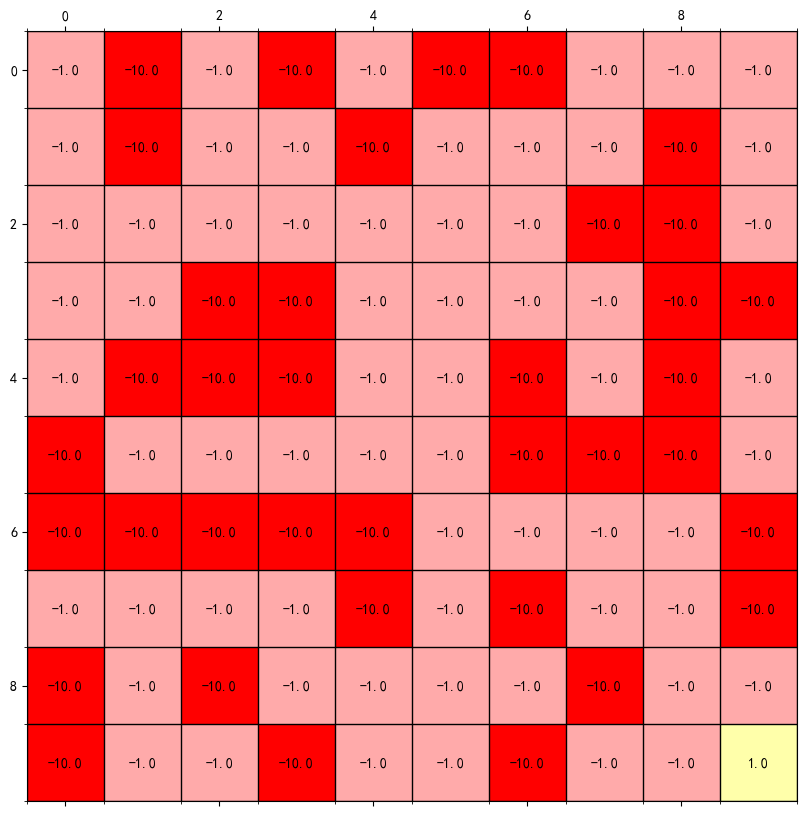

state value function


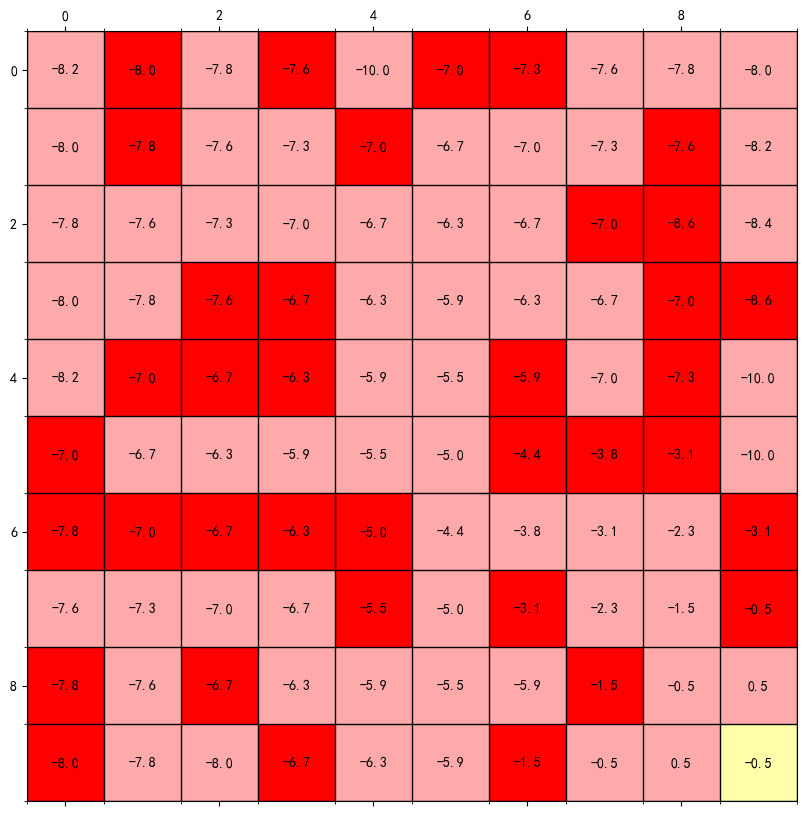

policy


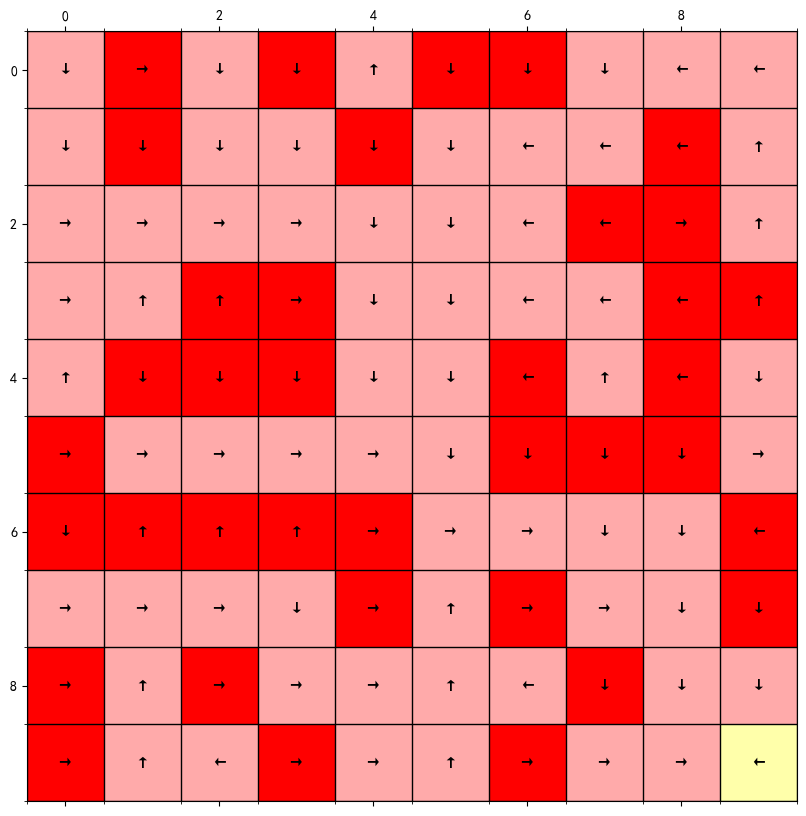

In [7]:
env = Env((10,10),p=0.4,seed=5,punish=-10)
policy, V = value_iteration_action(env,gamma=0.9)
print("原始图像")
show_grid(env,env.grid)
print("state value function")
show_grid(env,V)
print("policy")
show_policy(env,policy)